# Separating sets of features

We show a few examples that show that if we want to predict a label $Y$, we might prefer to select a subset of features $S$ that are d-separating $Y$ from a domain variable, or the context variable representing the target domain of interest.


In [101]:
#pip install scikit-learn
import numpy as np
from numpy.random import randn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#import statsmodels.api as sm

n_samples=1000

## Example 1: Linear SCM - observational data, perfect intervention and soft-intervention on $X_2$

We generate some simulated data for a linear SCM with 4 variables, where domain_number=0 represents observational data, domain_number=1 represents a perfect intervention on $X_2$, while any other domain number represents a soft intervention on $X_2$. We plot the observational graph:

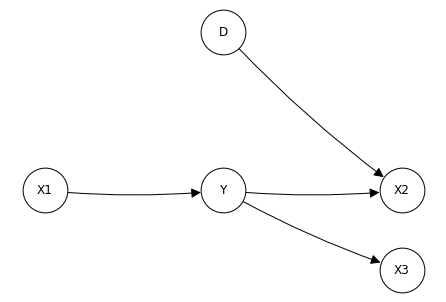

In [74]:
def linearSCM(n_samples, domain_number=0):
    epsilon_x1 = randn(n_samples)
    epsilon_y = randn(n_samples)
    epsilon_x2 = randn(n_samples)
    epsilon_x3 = randn(n_samples)
    
    x1 = epsilon_x1 + 10  
    y = 3 * x1 + epsilon_y
    if domain_number==0:
        x2 = - 2 * y + epsilon_x2 
    elif domain_number==1:
        x2 = 1
    else:
        x2 = 10 * y + epsilon_x2 
    x3 = 2 * y + 0.1*epsilon_x3
    df = pd.DataFrame({"d": domain_number, "x1": x1, "y": y, "x2": x2, "x3": x3})
    return df

G = nx.DiGraph()
G.add_edges_from([('X1','Y'), ('Y','X2'), ('Y','X3'), ('D','X2')])
pos = { 'X1': (-1, 0), 'Y': (0, 0), 'X2': (1, 0), 'X3': (1, -0.5), 'D': (0, 1)}
nx.draw(G, with_labels=True, pos= pos, node_color='w',node_size=2000, edgecolors ='black', connectionstyle="arc3,rad=0.05", arrowsize=20)

df_0 = linearSCM(n_samples, 0)
df_1 = linearSCM(n_samples, 1)
df_2 = linearSCM(n_samples, 2)

As expected, the distribution of $Y|X_1$ is the same across the different environments:

<AxesSubplot:xlabel='x1', ylabel='y'>

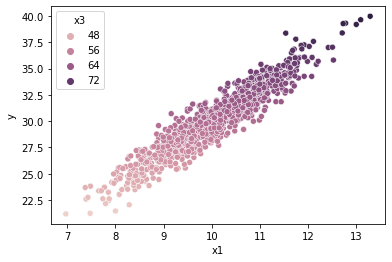

In [75]:
sns.scatterplot(data = df_0, x="x1", y="y", hue="x3")

<AxesSubplot:xlabel='x1', ylabel='y'>

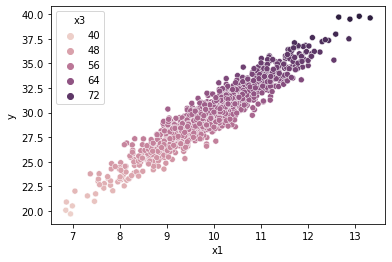

In [76]:
sns.scatterplot(data = df_1, x="x1", y="y", hue="x3")

<AxesSubplot:xlabel='x1', ylabel='y'>

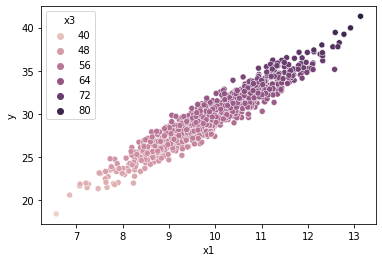

In [77]:
sns.scatterplot(data = df_2, x="x1", y="y", hue="x3")

<AxesSubplot:xlabel='x1', ylabel='y'>

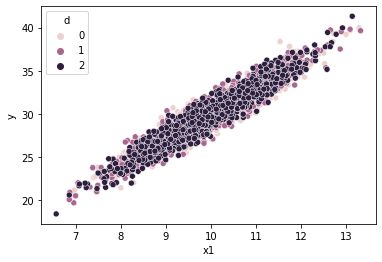

In [78]:
df = pd.concat([df_0,df_1,df_2]).reset_index()
sns.scatterplot(data = df, x="x1", y="y", hue="d")

In [79]:
Y_0 = df_0["y"].values.reshape(-1, 1)
Y_2 = df_2["y"].values.reshape(-1, 1)
X1_0 = df_0["x1"].values.reshape(-1, 1)
X1_2 = df_2["x1"].values.reshape(-1, 1)
model = LinearRegression().fit(X1_0, Y_0)
est_Y_2 = model.predict(X1_2)
print("Mean squared error predicting Y in environment 2 based on model learnt in environment 0 from X1", mean_squared_error(Y_2,est_Y_2))

Mean squared error predicting Y in environment 2 based on model learnt in environment 0 from X1 0.9336539410357941


On the other hand the distribution of $Y|X_2$ changes across the environments (which we can show in the plot, but also in the mean squared error):

Mean squared error predicting Y in environment 2 based on model learnt in environment 0 from X2 30518.374428658524


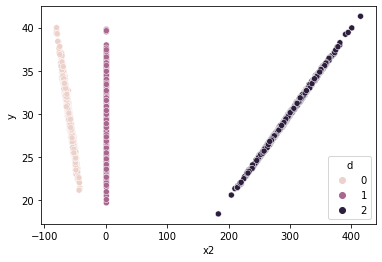

In [82]:
sns.scatterplot(data = df, x="x2", y="y", hue="d")
X2_0 = df_0["x2"].values.reshape(-1, 1)
X2_2 = df_2["x2"].values.reshape(-1, 1)
model = LinearRegression().fit(X2_0, Y_0)
est_Y_2 = model.predict(X2_2)
print("Mean squared error predicting Y in environment 2 based on model learnt in environment 0 from X2", mean_squared_error(Y_2,est_Y_2))

$X_3$ is even better at predicting Y because its noise has a smaller variance.

Mean squared error predicting Y in environment 2 based on model learnt in environment 0 from X3 0.0026001407602912526


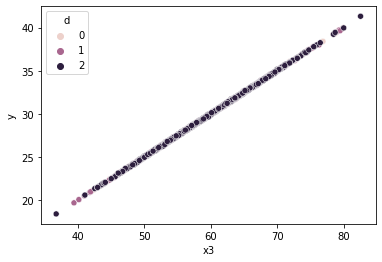

In [84]:
sns.scatterplot(data = df, x="x3", y="y", hue="d")

X3_0 = df_0["x3"].values.reshape(-1, 1)
X3_2 = df_2["x3"].values.reshape(-1, 1)
model = LinearRegression().fit(X3_0, Y_0)
est_Y_2 = model.predict(X3_2)
print("Mean squared error predicting Y in environment 2 based on model learnt in environment 0 from X3", mean_squared_error(Y_2,est_Y_2))

## Linear SCM with interventions on X1 and X2 (one intervention per environment)

We simulate now a linear SCM in which in domain 1 $X_1$ is intervened upon, while in domain 2 $X_2$ is intervened upon. We show the two graphs, one with a unique environment/domain variable, and one with two context variables each representing one of the two interventions.

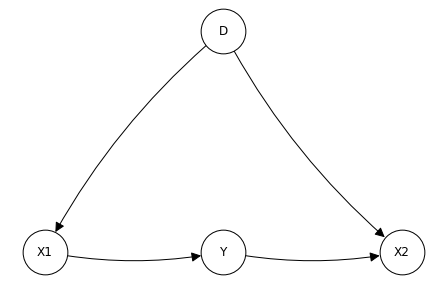

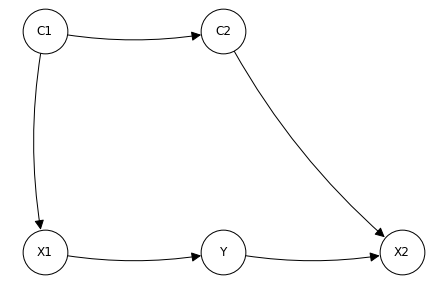

In [250]:
def linearSCM_2(n_samples, domain_number=0):
    epsilon_x1 = randn(n_samples)
    epsilon_y = randn(n_samples)
    epsilon_x2 = randn(n_samples)
    
    if domain_number != 1:
        x1 = epsilon_x1 
    else:
        x1 = 3 * epsilon_x1 
    y = 2 * x1  + epsilon_y
    if domain_number != 2:
        x2 = - 2 * y + epsilon_x2 
    else:
        x2 = 3 * y + epsilon_x2 
        
    c1 = 0
    c2 = 0
    if domain_number == 1: 
        c1 = 1
    elif domain_number == 2: 
        c2 = 1
    df = pd.DataFrame({"d": domain_number, "x1": x1, "y": y, "x2": x2, "c1": c1, "c2": c2})
    return df

G = nx.DiGraph()
G.add_edges_from([('D','X1'), ('X1','Y'), ('Y','X2'),  ('D', 'X2')])
pos = {'D': (0, 1), 'X1': (-1, 0), 'Y': (0, 0), 'X2': (1, 0)}
nx.draw(G, with_labels=True, pos= pos, node_color='w',node_size=2000, edgecolors ='black', connectionstyle="arc3,rad=0.1", arrowsize=20)
plt.show()

G_context = nx.DiGraph()
G_context.add_edges_from([('C1','X1'), ('X1','Y'), ('Y','X2'),  ('C2', 'X2'), ('C1', 'C2')])
pos2 = {'C1': (-1, 1), 'C2': (0, 1), 'X1': (-1, 0), 'Y': (0, 0), 'X2': (1, 0)}
nx.draw(G_context, with_labels=True, pos= pos2, node_color='w',node_size=2000, edgecolors ='black', connectionstyle="arc3,rad=0.1", arrowsize=20)

We show that $X_1$ and $X_2$ are good predictors from domain 0 to domain 1.

Mean squared error predicting Y in environment 1 based on model learnt in environment 0 from X1 1.036836180222471


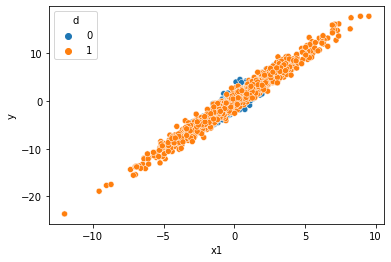

In [251]:
df0_2 = linearSCM_2(n_samples, 0)
df1_2 = linearSCM_2(n_samples, 1)
df2_2 = linearSCM_2(n_samples, 2)

df_sources = pd.concat([df0_2,df1_2])
sns.scatterplot(data = df_sources, x="x1", y="y", hue="d")

Y_0 = df0_2["y"].values.reshape(-1, 1)
Y_1 = df1_2["y"].values.reshape(-1, 1)
X1_0 = df0_2["x1"].values.reshape(-1, 1)
X1_1 = df1_2["x1"].values.reshape(-1, 1)
#polyreg=make_pipeline(PolynomialFeatures(2),LinearRegression())
#polyreg.fit(X1_0, Y_0)
#est_Y_1 = polyreg.predict(X1_1)
model = LinearRegression().fit(X1_0, Y_0)
est_Y_1 = model.predict(X1_1)
print("Mean squared error predicting Y in environment 1 based on model learnt in environment 0 from X1", mean_squared_error(Y_1,est_Y_1))

Mean squared error predicting Y in environment 1 based on model learnt in environment 0 from X2 0.3137102667332692


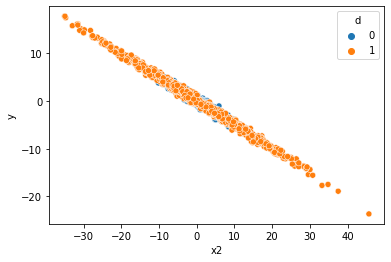

In [252]:
sns.scatterplot(data = df_sources, x="x2", y="y", hue="d")
X2_0 = df0_2["x2"].values.reshape(-1, 1)
X2_1 = df1_2["x2"].values.reshape(-1, 1)
model = LinearRegression().fit(X2_0, Y_0)
est_Y_1 = model.predict(X2_1)
print("Mean squared error predicting Y in environment 1 based on model learnt in environment 0 from X2", mean_squared_error(Y_1,est_Y_1))

On the other hand, while $X_1$ has a similar mean squared error when applying a model learnt on environment 0 to environment 2, $X_2$ has a very large error.

Mean squared error predicting Y in environment 2 based on model learnt in environments 0 and 1 from X1 0.9971053651434879


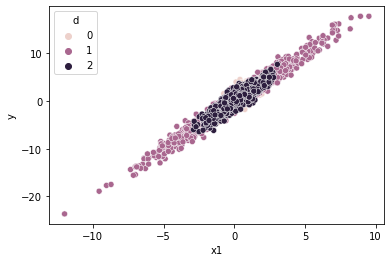

In [259]:
df_all = pd.concat([df0_2,df1_2,df2_2])
sns.scatterplot(data = df_all, x="x1", y="y", hue="d")
Y_sources= df_sources["y"].values.reshape(-1, 1)
Y_2 = df2_2["y"].values.reshape(-1, 1)
X1_sources= df_sources["x1"].values.reshape(-1, 1)
X1_2 = df2_2["x1"].values.reshape(-1, 1)
model = LinearRegression().fit(X1_sources, Y_sources)
est_Y_2 = model.predict(X1_2)
print("Mean squared error predicting Y in environment 2 based on model learnt in environments 0 and 1 from X1", mean_squared_error(Y_2,est_Y_2))

Mean squared error predicting Y in environment 2 based on model learnt in environments 0 and 1 from X2 30.108455823919854


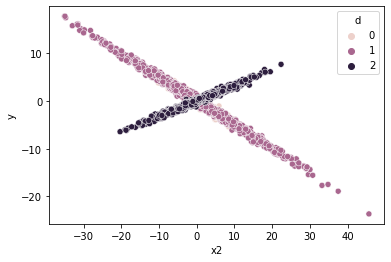

In [260]:
sns.scatterplot(data = df_all, x="x2", y="y", hue="d")
Y_sources= df_sources["y"].values.reshape(-1, 1)
Y_2 = df2_2["y"].values.reshape(-1, 1)
X2_sources= df_sources["x2"].values.reshape(-1, 1)
X2_2 = df2_2["x2"].values.reshape(-1, 1)
model = LinearRegression().fit(X2_sources, Y_sources)
est_Y_2 = model.predict(X2_2)
print("Mean squared error predicting Y in environment 2 based on model learnt in environments 0 and 1 from X2", mean_squared_error(Y_2,est_Y_2))